In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Edgar Junior Córdoba Gamboa
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
import math as math
def taylor_sen(angulo,iteraciones):
#Calcula el seno de un ángulo usando la serie de Taylor angulo: ángulo en radianes iteraciones: número de operaciones
   sen=0
   for i in range(iteraciones):
    sen+=(-1)**i*angulo**(2*i+1)/math.factorial(2*i+1) #Serie de taylor
   return sen


In [ ]:
import numpy as np
x= np.deg2rad(30) #Convertir degrees a radianes
max_iter=10 #número de iteraciones
seno=taylor_sen(x,max_iter)
seno_real=np.sin(x)
print(f'el valor de sen con {max_iter} iteraciones es {seno}')
print(f'el valor real será: {seno_real}')
print(seno == seno_real)

el valor de sen con 10 iteraciones es 0.49999999999999994
el valor real será: 0.49999999999999994
True


In [ ]:
import math as math
def taylor_seno32(angulo,tol):
  seno=0
  real=math.sin(angulo)
  i=0
  while abs(real -seno)> tol:
    seno+=(-1)**i*angulo**(2*i+1)/math.factorial(2*i+1) #Serie de taylor
    i +=1
  return i,seno

In [ ]:
x= math.radians(80)
tol_=np.finfo(np.float32).eps #Epsilon de la máquina
N, seno_= taylor_seno32(x,tol_)
print(f'Terminos: {N}')

Terminos: 6


In [ ]:
def taylor_seno32(angulo, tol):
    max_iter = 100
    seno = 0
    real = math.sin(angulo)
    i = 0
    errors = np.zeros(max_iter)
    iteraciones = np.arange(max_iter)

    while abs(real - seno) > tol and i < max_iter:
        seno += (-1)**i * angulo**(2*i+1) / math.factorial(2*i+1)  # Serie de Taylor
        error = abs(real - seno)
        errors[i] = error
        i += 1

    return seno, errors[:i], i  # Devuelve el seno calculado, errores, y cantidad de iteraciones

In [ ]:
import numpy as np

x = math.radians(80)
tol_ = np.finfo(np.float32).eps  # Epsilon de la máquina para float32

seno_, er, N = taylor_seno32(x, tol_)
print(f'Términos: {N}')
print(f'Valor de seno(80°): {seno_}')

Términos: 6
Valor de seno(80°): 0.9848077408146284


In [ ]:
def taylor_seno64(angulo,tol):
  max_iter=100
  seno=0
  real=math.sin(angulo)
  i=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones=np.arange(max_iter) #Iteración asociada al error


  while abs(real -seno)> tol:
    seno+=(-1)**i*angulo**(2*i+1)/math.factorial(2*i+1) #Serie de taylor
    error= abs(real-seno)
    errors[i]=error
    i +=1
    if i> max_iter:
      break
  return errors[:i],iteraciones[:i],seno

In [ ]:
x= math.radians(100)
tol_=np.finfo(np.float64).eps #Epsilon de la máquina
er,N, seno_= taylor_seno64(x,tol_)
print(f'Terminos: {N}')

Terminos: [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
import numpy as np
import math

def error_porcentual(exacto, aprox):
    err_porcentual = (abs(exacto - aprox) / abs(exacto)) * 100
    return err_porcentual

def taylor_seno32(angulo, tol):
    max_iter = 100
    seno = 0
    real = math.sin(angulo)
    i = 0
    errors = np.zeros(max_iter)
    iteraciones = np.arange(max_iter)

    while abs(real - seno) > tol and i < max_iter:
        seno += (-1)**i * angulo**(2*i+1) / math.factorial(2*i+1)  # Serie de Taylor
        error = abs(real - seno)
        errors[i] = error
        i += 1

    return seno, errors[:i], i

tol = np.finfo(np.float32).eps  # Epsilon de la máquina para float32

# Solo tomamos el primer valor (seno aproximado) que devuelve la función taylor_seno32
seno_aprox, _, _ = taylor_seno32(math.pi / 4, tol)

# Calculamos el error porcentual usando el seno aproximado
l = error_porcentual(math.sin(math.pi / 4), seno_aprox)

print('El error porcentual entre el aproximado y el exacto es de', l)


El error porcentual entre el aproximado y el exacto es de 2.475325811534497e-07


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial

'''En este código simplemente se define la serie e^-x'''
def taylor_exp(x, N):

  series_sum = 0

  for i in range (N+1):

    series_sum += (-1)**i * x**i/ factorial(i)

  return series_sum

In [ ]:
'''(Punto a)
Esta función busca el número óptimo de términos N que necesitamos para aproxima e^-x con suficiente precisión.
La serie de Taylor se suma término por término, y el código se detiene cuando el siguiente término es demasiado
pequeño para mejorar la precisión'''
def N_optimo(x, tol= 1e-7):

  N=0

  series_sum=0

  next_term= tol + 1 #Para que entre en el bucle

  while abs(next_term) > tol * abs(series_sum): # Bucle hasta que el siguiente término sea lo suficientemente pequeño

    next_term = (-1) **N * x ** N /factorial(N)

    series_sum += next_term

    N +=1

  return N - 1  # Resto 1 porque N se incrementa una vez más al final

N_optimo(0.5)


9

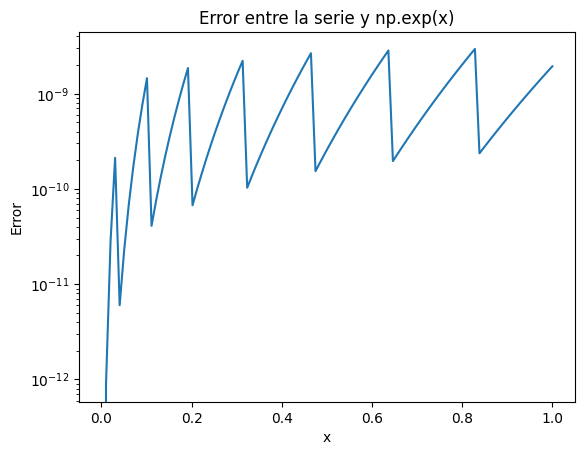

In [ ]:
def compara_series_vs_exp():

    x_vals = np.linspace(0, 1, 100)
    errors = []
    for x in x_vals:
        N_opt = N_optimo(x)
        approx = taylor_exp(x, N_opt)
        exact = np.exp(-x)
        error = abs(approx - exact)
        errors.append(error)
    return x_vals, errors

x_vals, errors = compara_series_vs_exp()
plt.plot(x_vals, errors)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error entre la serie y np.exp(x)')
plt.show()

In [ ]:
'''
(Punto b)
Cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas
'''
def cancel_sus(x,N):

  terminos= []

  for i in range(N+1):

    termino = (-1)**i * x * i/ factorial(i)

    terminos.append(termino)

  return terminos

x_val= 10

N_opt = N_optimo(x_val)

terminos= cancel_sus(x_val,N_opt)

if len(terminos) > 9:  # Verificamos si hay al menos 10 términos

    termino_9 = terminos[9]  # Accedemos al término en el índice 9

    print(f'Término 9: {termino_9}')

else:

    print("No hay suficientes términos calculados para acceder al término 9.")



Término 9: -0.000248015873015873


In [ ]:
'''
(Punto c)
Alternativo para calcular e^-x
'''
def exp_x_grande_x(x):

  if x < 10:

    return taylor_exp(x, N_optimo(x))

  else:

    return 1 / np.exp(x)

<ipython-input-38-4959e1c0fccf>:15: RuntimeWarning: overflow encountered in scalar power
  next_term = (-1) **N * x ** N /factorial(N)
<ipython-input-37-2b4ffa600caf>:13: RuntimeWarning: overflow encountered in scalar power
  series_sum += (-1)**i * x**i/ factorial(i)


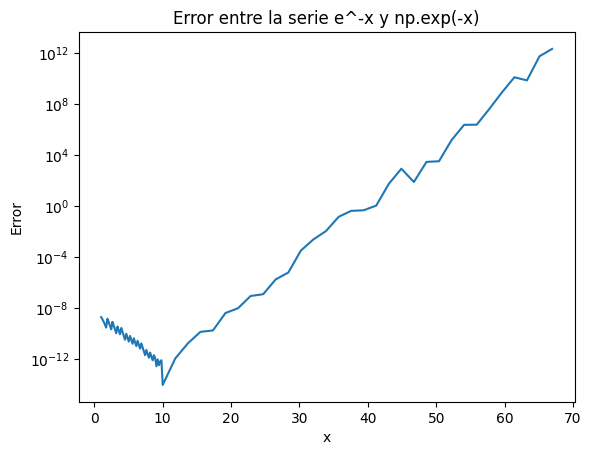

In [ ]:
'''
Punto (d)
Esta función estudia experimentalmente cuándo la serie de Taylor para e^-x comineza a perder precisión al aumentar x
'''

def estudio_de_precision():

  x_vals1 = np.linspace(1,10,50) #Tomando un intervalo a conveniencia
  x_vals2 = np.linspace(10,100,50)

  errores=[]

  x_vals = np.concatenate((x_vals1,x_vals2))

  for x in x_vals:

    N_opt= N_optimo(x)

    aprox = taylor_exp(x,N_opt) # Aproximación de la serie de taylor usando N_opt

    n_exacto= np.exp(-x) #Valor exacto de np.exp(-x) para comparar

    error= abs(aprox-n_exacto)

    errores.append(error)

  return x_vals,errores

x_vals, errors = estudio_de_precision()
plt.plot(x_vals, errors)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error entre la serie e^-x y np.exp(-x)')
plt.show()



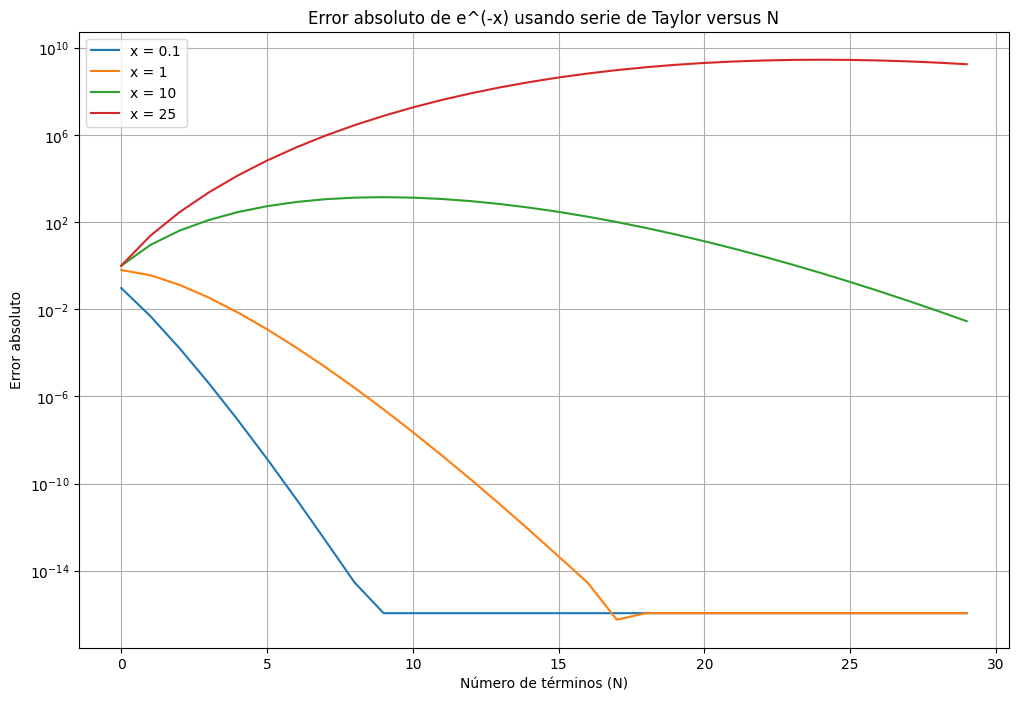

In [ ]:
'''Punto e'''
'''El gráfico resultante mostrará cómo el error absoluto disminuye a medida que aumentas el número de términos N
en la serie de Taylor para diferentes valores de x. Esto permitirá visualizar la convergencia de la serie y ver
cómo se comporta para varios rangos de x.'''
x_values = [0.1, 1, 10, 25]# Valores de x para analizar


plt.figure(figsize=(12, 8))



for x in x_values:
    N_values = np.arange(0, 30)  # Rango de N de 0 a 29
    errors = []

    # Calcular el error para cada N
    for N in N_values:
        approx = taylor_exp(x, N)
        exact = np.exp(-x)
        error = abs(approx - exact)
        errors.append(error)

    # Graficar el error versus N para el valor actual de x
    plt.plot(N_values, errors, label=f'x = {x}')

# Configurar el gráfico
plt.yscale('log')  # Usar escala logarítmica en el eje Y
plt.xlabel('Número de términos (N)')
plt.ylabel('Error absoluto')
plt.title('Error absoluto de e^(-x) usando serie de Taylor versus N')
plt.legend()
plt.grid(True)
plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
'''
(Punto a) Tres funciones que realicen el cálculo de S(1),S(2),S(3)
'''
def S1(N):
  S=0
  for n in range(1,2*N + 1):
    S += (-1)**n * n/ n+1
  return S

def S2(N):
  sum1=0
  sum2=0
  for n in range (1, N+1):
    sum1 += (2*n -1)/2*n
    sum2 += (2*n) / (2*n +1)
  return -sum1 + sum2

def S3(N):
  S=0
  for n in range (1, N+1):
    S += 1/ ((2*n) * (2*n + 1))
  return S

In [ ]:
'''
(Punto b) Estudio de convergencia
'''
N_max = 10**6
Ns = np.logspace(1, np.log10(N_max), 50, dtype=int)  # Genera valores logarítmicos de N

# Inicializar listas para almacenar los valores de las series
S1_vals = []
S2_vals = []
S3_vals = []

# Calcular las tres series para los diferentes valores de N
for N in Ns:
    S1_vals.append(S1(N))
    S2_vals.append(S2(N))
    S3_vals.append(S3(N))

# Convertir listas a arrays de numpy
S1_vals = np.array(S1_vals)
S2_vals = np.array(S2_vals)
S3_vals = np.array(S3_vals)

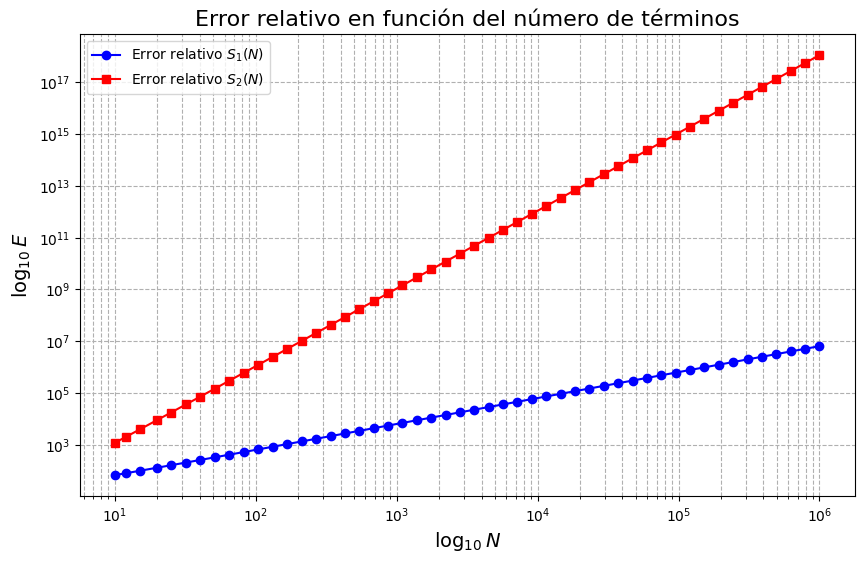

In [ ]:
'''
(Punto c) Gráfico de log del error relativo
'''
E1 = np.abs((S1_vals - S3_vals) / S3_vals)
E2 = np.abs((S2_vals - S3_vals) / S3_vals)

# Gráfico log-log de Log10E vs Log10N
plt.figure(figsize=(10, 6))
plt.loglog(Ns, E1, label=r'Error relativo $S_1(N)$', color='blue', marker='o')
plt.loglog(Ns, E2, label=r'Error relativo $S_2(N)$', color='red', marker='s')

plt.xlabel(r'$\log_{10} N$', fontsize=14)
plt.ylabel(r'$\log_{10} E$', fontsize=14)
plt.title('Error relativo en función del número de términos', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()